In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder #перетворювати стрінгові данні в числові для побудови графіків
import numpy as np
from tabulate import tabulate
from sklearn.neighbors import KNeighborsClassifier #
from sklearn.model_selection import train_test_split # Всі три що б натренувати модельку
from sklearn import metrics #
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv("ds_salaries.csv")
sns.set_style("whitegrid")
sns.set_palette("husl")
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [3]:
df = df.drop("employment_type", axis=1)
for col in df.columns:
    if col != "salary" and col != "salary_in_usd" and col != "job_title":
        print(col)
        print(df[col].unique())

work_year
[2023 2022 2020 2021]
experience_level
['SE' 'MI' 'EN' 'EX']
salary_currency
['EUR' 'USD' 'INR' 'HKD' 'CHF' 'GBP' 'AUD' 'SGD' 'CAD' 'ILS' 'BRL' 'THB'
 'PLN' 'HUF' 'CZK' 'DKK' 'JPY' 'MXN' 'TRY' 'CLP']
employee_residence
['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT']
remote_ratio
[100   0  50]
company_location
['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 

In [4]:
cm = sns.light_palette("blue", as_cmap=True)
styled_table = df.groupby("experience_level")[["salary", "salary_in_usd"]].sum().style.background_gradient(cmap=cm).set_caption("Salary Summary by Experience Level")
styled_table

,salary,salary_in_usd
experience_level,,
EN,60281977,25134811
EX,28135451,22222126
MI,199801247,84143381
SE,427843197,385076496


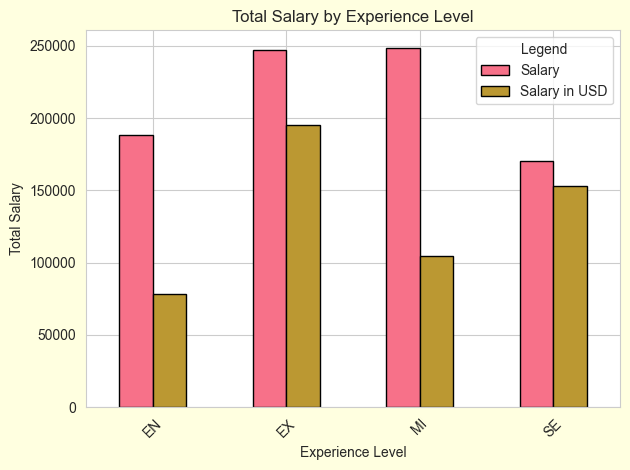

In [5]:
ax = df.groupby("experience_level")[["salary", "salary_in_usd"]].mean().plot(kind="bar", edgecolor = "black")
plt.title("Total Salary by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Total Salary")
ax.legend(["Salary", "Salary in USD"], title="Legend")
plt.gcf().set_facecolor('lightyellow')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [6]:
cross_table = pd.crosstab(df["employee_residence"], df["company_size"])
transposed_cross_table = cross_table.T
column_sums = transposed_cross_table.sum(axis=0)
transposed_cross_table_sorted = transposed_cross_table[column_sums.sort_values(ascending=False).index]
print(tabulate(transposed_cross_table_sorted, headers='keys', tablefmt='grid'))

+----------------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+
| company_size   |   US |   GB |   CA |   ES |   IN |   DE |   FR |   PT |   BR |   GR |   NL |   AU |   MX |   IT |   PK |   JP |   NG |   IE |   PL |   AT |   AR |   PR |   SG |   TR |   BE |   CO |   RU |   CH |   SI |   LV |   UA |   HU |   TH |   RO |   AE |   HR |   DK |   BO |   VN |   SE |   UZ |   HK |   AS |   GH |   KE |   PH |   LT |   FI |   CZ |   CF |   CL |   AM |   CR |   RS |   CN |   TN |   SK |   HN |   BG |   B

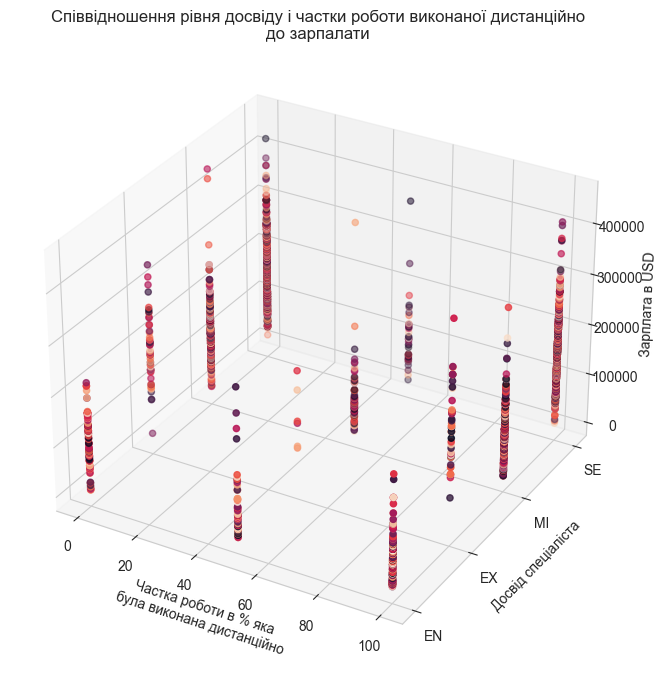

In [7]:
df_encoded = df.copy()

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'experience_level' column
df_encoded['experience_level_encoded'] = label_encoder.fit_transform(df['experience_level'])

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extracting data from the DataFrame
remote_ratio = df_encoded['remote_ratio']
experience_level_encoded = df_encoded['experience_level_encoded']
salary_in_usd = df_encoded['salary_in_usd']
colors = np.random.rand(len(df_encoded))

# Plotting the data
ax.scatter(remote_ratio, experience_level_encoded, salary_in_usd, c=colors, marker='o')

# Set labels and title
ax.set_xlabel('Частка роботи в % яка\nбула виконана дистанційно')
ax.set_ylabel('Досвід спеціаліста')
ax.set_zlabel('Зарплата в USD')
ax.set_title('Співвідношення рівня досвіду і частки роботи виконаної дистанційно\nдо зарпалати')

# Set tick labels for the encoded experience levels
ax.set_yticks(label_encoder.transform(label_encoder.classes_))
ax.set_yticklabels(label_encoder.classes_)

plt.show()


C:\Users\roman\AppData\Local\Temp\ipykernel_3376\2774736712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=avg_salary_by_job_title, y=avg_salary_by_job_title.index, palette="viridis")


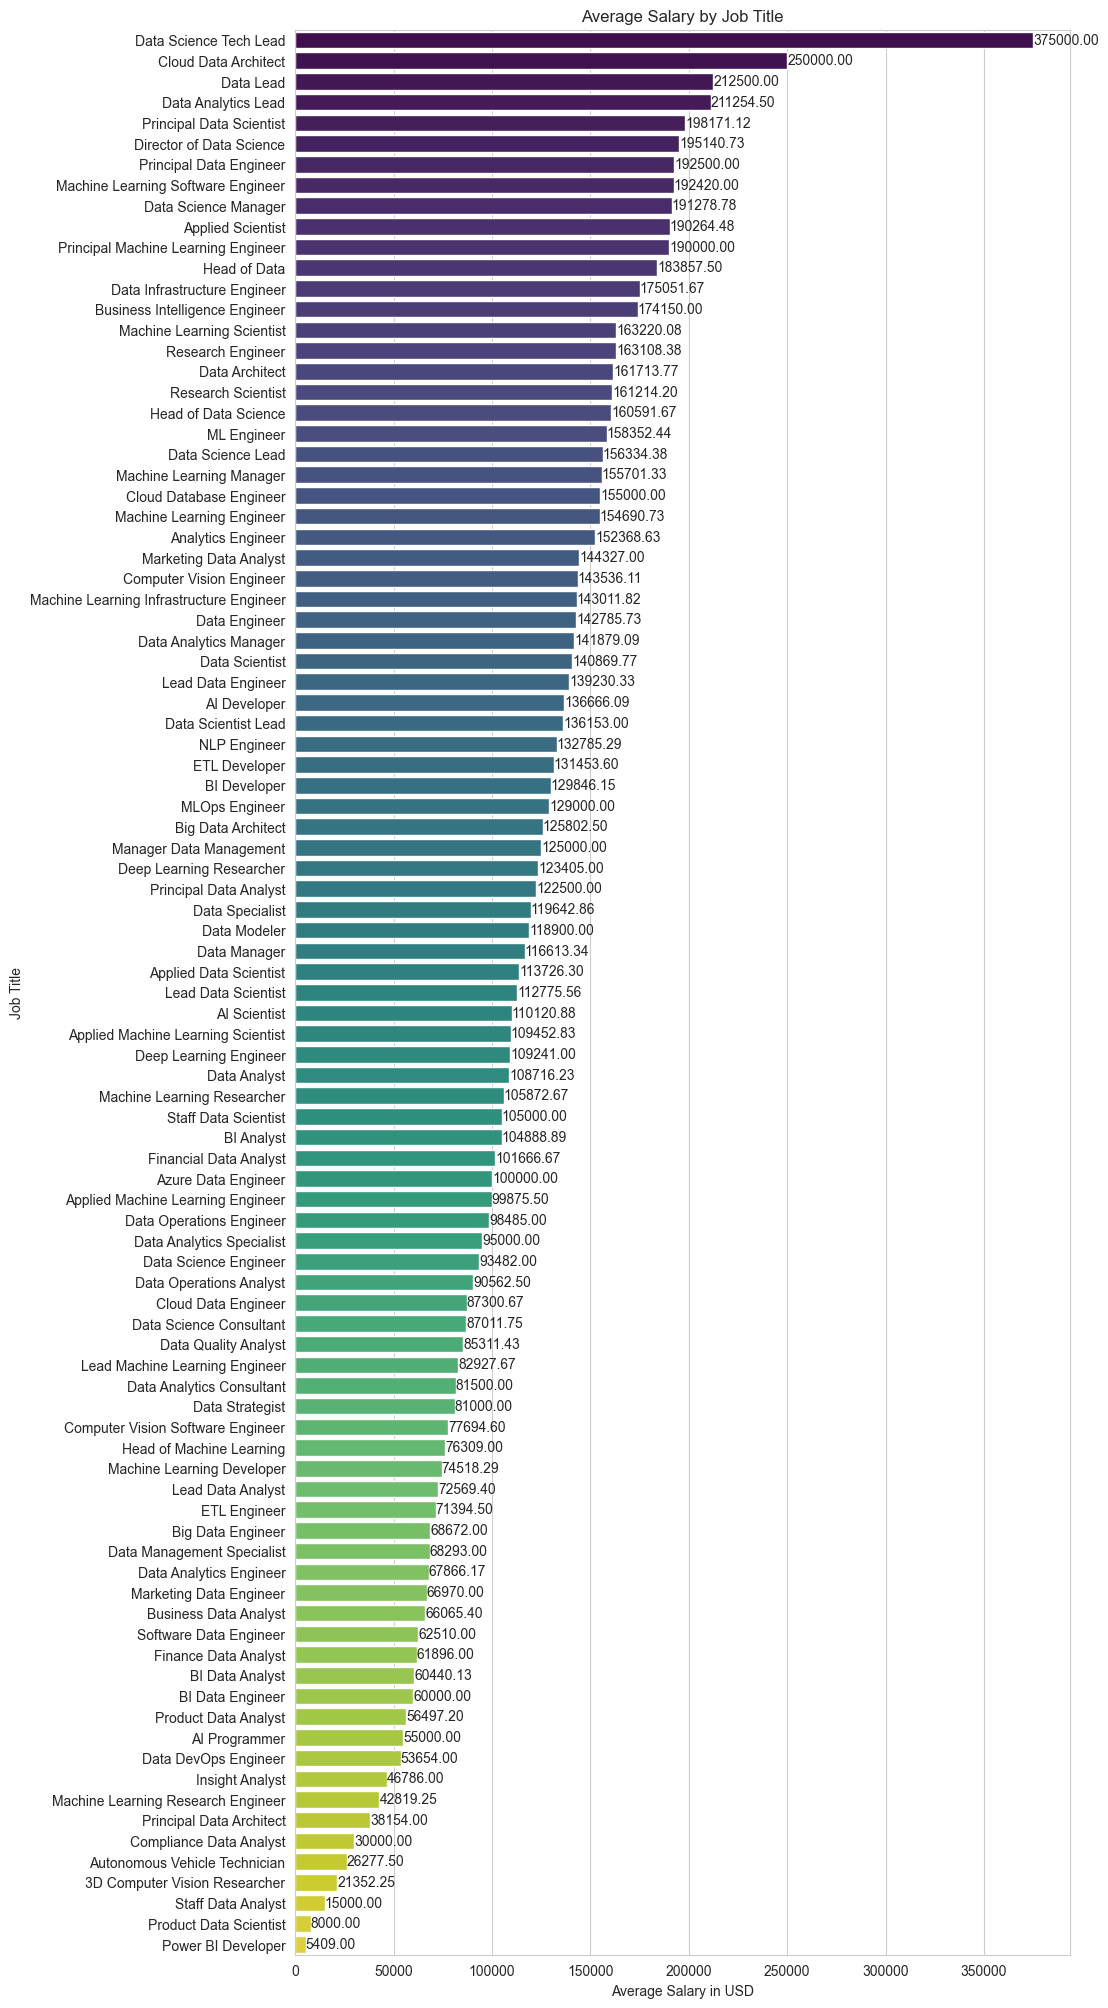

In [8]:
avg_salary_by_job_title = df.groupby("job_title")["salary_in_usd"].mean().sort_values(ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(10, 25))  # Adjust the figure size as needed
bar_plot = sns.barplot(x=avg_salary_by_job_title, y=avg_salary_by_job_title.index, palette="viridis")

# Display the values on the bars
for index, value in enumerate(avg_salary_by_job_title):
    bar_plot.text(value, index, f'{value:.2f}', va='center')

plt.xlabel("Average Salary in USD")
plt.ylabel("Job Title")
plt.title("Average Salary by Job Title")
plt.show()

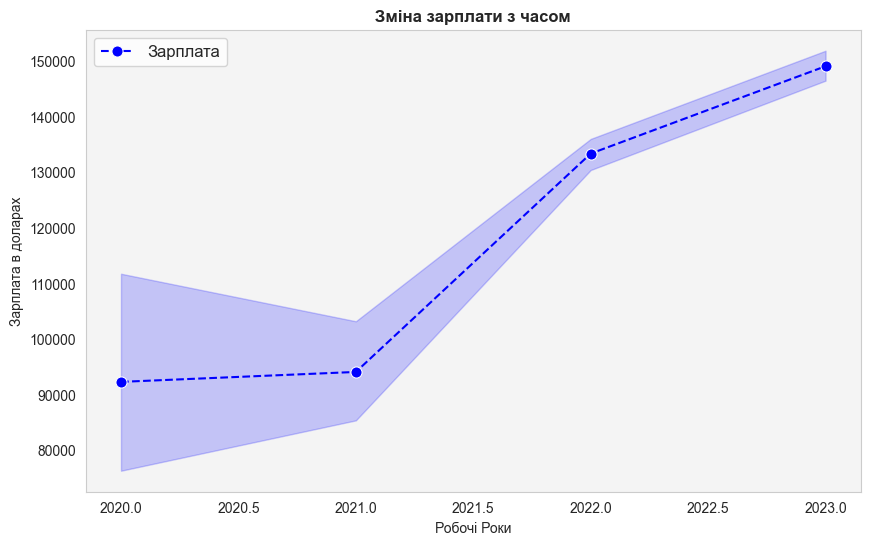

In [9]:
plt.figure(figsize = (10,6))
salary_trend = df[['salary_in_usd', 'work_year']].sort_values(by = 'work_year')
p = sns.lineplot(data =salary_trend ,x = 'work_year', y = 'salary_in_usd', marker = 'o',linestyle='--', color='Blue', markersize=8 )
plt.title('Зміна зарплати з часом', fontsize=12, fontweight='bold')

# Customize the background color
p.set_facecolor("#f4f4f4")
plt.legend(['Зарплата'], loc='best', fontsize=12)
plt.ylabel("Зарплата в доларах")
plt.xlabel("Робочі Роки")
# Remove the grid lines
p.grid(False)

plt.show()

In [10]:
skledf = df[['job_title', 'company_size', 'employee_residence', 'salary_in_usd', 'remote_ratio']]
X = skledf.iloc[:, :-1]  
y = skledf.iloc[:, -1]

skledf = pd.get_dummies(skledf, columns=['job_title', 'company_size', 'employee_residence'])

X = skledf.drop(columns=['remote_ratio'])
y = skledf['remote_ratio']

# Split the data into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)

# Train the KNeighborsClassifier model
classifier = KNeighborsClassifier(n_neighbors=6).fit(Xtrain, ytrain)

# Predict the target variable for test data
ypred = classifier.predict(Xtest)
i = 0


In [11]:
print ("\n-------------------------------------------------------------------------")
print ("%-25s %-25s %-25s" % ("Original Label", "Predicted Label", "Correct/Wrong"))
print ("-------------------------------------------------------------------------")
for label in ytest:
    print ("%-25s %-25s" % (label, ypred[i]), end="")
    if (label == ypred[i]):
        print (" %-25s" % ("Correct"))
    else:
        print (" %-25s" % ("Wrong"))
    i = i + 1


-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
100                       100                       Correct                  
100                       0                         Wrong                    
100                       100                       Correct                  
0                         0                         Correct                  
50                        0                         Wrong                    
100                       100                       Correct                  
0                         0                         Correct                  
50                        0                         Wrong                    
50                        100                       Wrong                    
0                         100                       Wrong              

In [12]:
print ("-------------------------------------------------------------------------")
print("\nConfusion Matrix:\n",metrics.confusion_matrix(ytest, ypred))  
print ("-------------------------------------------------------------------------")
print("\nClassification Report:\n",metrics.classification_report(ytest, ypred)) 
print ("-------------------------------------------------------------------------")
print("Accuracy of the classifer is %0.2f" % metrics.accuracy_score(ytest,ypred))
print ("-------------------------------------------------------------------------")

-------------------------------------------------------------------------

Confusion Matrix:
 [[403   2 105]
 [ 16   2  27]
 [208   9 167]]
-------------------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.79      0.71       510
          50       0.15      0.04      0.07        45
         100       0.56      0.43      0.49       384

    accuracy                           0.61       939
   macro avg       0.45      0.42      0.42       939
weighted avg       0.58      0.61      0.59       939

-------------------------------------------------------------------------
Accuracy of the classifer is 0.61
-------------------------------------------------------------------------


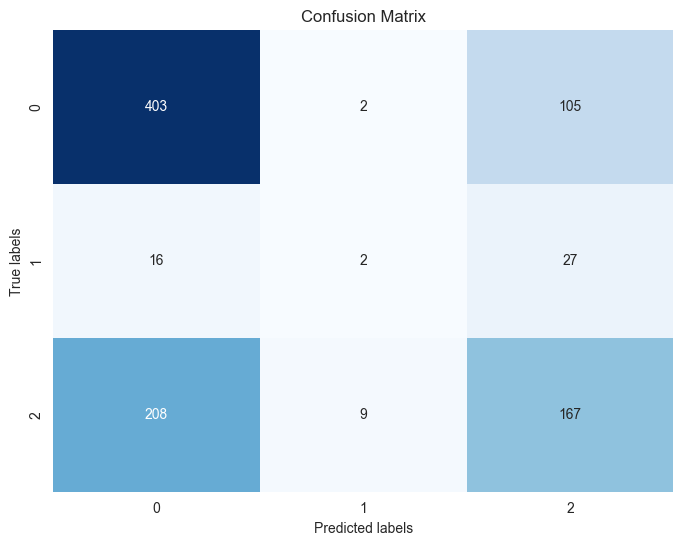

In [13]:
confusion_matrix = metrics.confusion_matrix(ytest, ypred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
df = df[df["remote_ratio"] != 50]
df["remote_ratio"].value_counts()

remote_ratio
0      1923
100    1643
Name: count, dtype: int64

In [36]:
skledf = df[['job_title', 'company_size', 'employee_residence', 'salary_in_usd', 'remote_ratio']]
X = skledf.iloc[:, :-1]  
y = skledf.iloc[:, -1]

skledf = pd.get_dummies(skledf, columns=['job_title', 'company_size', 'employee_residence'])

X = skledf.drop(columns=['remote_ratio'])
y = skledf['remote_ratio']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=42)
classifier = KNeighborsClassifier(n_neighbors=5).fit(Xtrain, ytrain)
ypred = classifier.predict(Xtest)
i = 0

In [37]:
print ("\n-------------------------------------------------------------------------")
print ("%-25s %-25s %-25s" % ("Original Label", "Predicted Label", "Correct/Wrong"))
print ("-------------------------------------------------------------------------")
for label in ytest:
    print ("%-25s %-25s" % (label, ypred[i]), end="")
    if (label == ypred[i]):
        print (" %-25s" % ("Correct"))
    else:
        print (" %-25s" % ("Wrong"))
    i = i + 1


-------------------------------------------------------------------------
Original Label            Predicted Label           Correct/Wrong            
-------------------------------------------------------------------------
0                         0                         Correct                  
100                       100                       Correct                  
100                       0                         Wrong                    
0                         0                         Correct                  
100                       100                       Correct                  
100                       100                       Correct                  
100                       100                       Correct                  
0                         0                         Correct                  
100                       100                       Correct                  
0                         0                         Correct            

-------------------------------------------------------------------------

Confusion Matrix:
 [[356 138]
 [189 209]]
-------------------------------------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.72      0.69       494
         100       0.60      0.53      0.56       398

    accuracy                           0.63       892
   macro avg       0.63      0.62      0.62       892
weighted avg       0.63      0.63      0.63       892

-------------------------------------------------------------------------
Accuracy of the classifer is 0.63
-------------------------------------------------------------------------


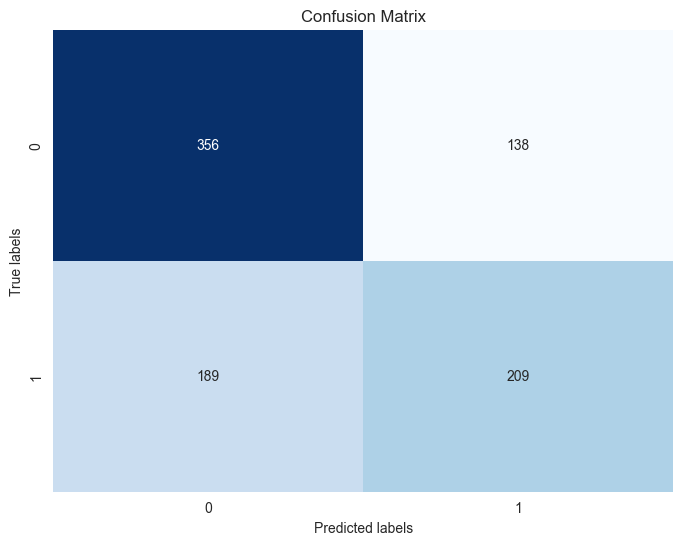

In [38]:
confusion_matrix = metrics.confusion_matrix(ytest, ypred)
print ("-------------------------------------------------------------------------")
print("\nConfusion Matrix:\n",confusion_matrix)  
print ("-------------------------------------------------------------------------")
print("\nClassification Report:\n",metrics.classification_report(ytest, ypred)) 
print ("-------------------------------------------------------------------------")
print("Accuracy of the classifer is %0.2f" % metrics.accuracy_score(ytest,ypred))
print ("-------------------------------------------------------------------------")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()